# RNA families

Esta es una versión similar a la que dice "sim" pero acá hago todo en **distancias** en lugar de similaridades.

240204

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

/home/dmilone/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
DATA_PATH = "/DATA/lncRNA/data/"

In [3]:
dataset = pd.read_csv(f"{DATA_PATH}archiveII_220808.csv", index_col="id")
#dataset

In [4]:
splits = pd.read_csv(f"{DATA_PATH}archiveII_all_splits2.csv")
# "archiveII_all_splits"  just original archiveii splits (k-fold & fam-fold)
# "archiveII_all_splits2" includes human-learned (HL) splits 10, 25, 50, 75 y 90
splits

,Unnamed: 0,Unnamed: 0.1,split_type,fold_name,fold_number,partition,id
0,0,0,k-fold,0,0,train,tmRNA_Stre.gord._TRW-29390_1-349
1,1,1,k-fold,0,0,train,tRNA_tdbR00000055-Schizosaccharomyces_pombe-48...
2,2,2,k-fold,0,0,train,srp_List.mono._U15684
3,3,3,k-fold,0,0,train,srp_Vibr.fisc._CP000020
4,4,4,k-fold,0,0,train,srp_Baci.thur._D11412
...,...,...,...,...,...,...,...
73430,73980,71545,HL90-fold,0,0,train,srp_Fran.tula._CP000608
73431,73981,71546,HL90-fold,0,0,train,tRNA_tdbR00000425-Drosophila_melanogaster-7227...
73432,73982,71547,HL90-fold,0,0,train,tRNA_tdbR00000514-Scenedesmus_obliquus-3088-In...
73433,73983,71548,HL90-fold,0,0,train,5s_Rattus-norvegicus-1


In [5]:
# seqeucence distancies
str_dist = pd.read_hdf(DATA_PATH + "rnadist_f_all.h5") # RNAdistance
seq_sim = pd.read_hdf(DATA_PATH + "seqsim_f_all.h5") # IDscore

In [25]:
str_dist

id,5s_Acholeplasma-laidlawii-1,5s_Acidovorax-temperans-1,tmRNA_Stre.gord._TRW-29390_1-349,tRNA_tdbR00000055-Schizosaccharomyces_pombe-4896-Glu-3UC,srp_List.mono._U15684,5s_Methanothermobacter-thermautotrophicus-6,srp_Vibr.fisc._CP000020,srp_Baci.thur._D11412,grp1_a.I1.m.M.grisea.B2.ND1,5s_Saprospira-grandis-1,...,RNaseP_M.avium,tRNA_tdbR00000521-Bos_taurus-9913-Ini-CAU,grp1_a.I1.e.P.pachydermus.C1.SSU.943,5s_Pseudomonas-stutzeri-2,16s_T.maritima_domain3,5s_Bacillus-cereus-6,srp_Myco.aviu._AE016958,tmRNA_Heli.pylo._AE001503_1-383,5s_Triticum-aestivum-1,5s_Streptomyces-violaceus-1
id,,,,,,,,,,,,,,,,,,,,,
5s_Acholeplasma-laidlawii-1,0.000000,0.130435,0.805158,0.562500,0.799283,0.265625,0.776786,0.756458,0.782456,0.173554,...,0.763819,0.625000,0.795918,0.150000,0.817734,0.140351,0.696429,0.806789,0.200000,0.216667
5s_Acidovorax-temperans-1,0.130435,0.000000,0.819484,0.591304,0.802867,0.179688,0.747826,0.752768,0.778947,0.132231,...,0.756281,0.652174,0.798469,0.108333,0.815271,0.130435,0.756522,0.814621,0.191667,0.125000
tmRNA_Stre.gord._TRW-29390_1-349,0.805158,0.819484,0.000000,0.785100,1.002865,0.799427,0.762178,0.951289,0.693410,0.802292,...,0.675879,0.805158,0.686224,0.822350,0.701970,0.810888,0.839542,0.234987,0.805158,0.793696
tRNA_tdbR00000055-Schizosaccharomyces_pombe-4896-Glu-3UC,0.562500,0.591304,0.785100,0.000000,0.824373,0.570312,0.720721,0.789668,0.821053,0.578512,...,0.826633,0.253333,0.839286,0.541667,0.825123,0.570175,0.943182,0.804178,0.541667,0.591667
srp_List.mono._U15684,0.799283,0.802867,1.002865,0.824373,0.000000,0.770609,0.616487,0.279570,1.066667,0.759857,...,0.997487,0.799283,0.890306,0.784946,0.967980,0.763441,0.784946,0.981723,0.770609,0.756272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5s_Bacillus-cereus-6,0.140351,0.130435,0.810888,0.570175,0.763441,0.234375,0.798246,0.763838,0.761404,0.157025,...,0.768844,0.596491,0.785714,0.133333,0.788177,0.000000,0.684211,0.822454,0.233333,0.183333
srp_Myco.aviu._AE016958,0.696429,0.756522,0.839542,0.943182,0.784946,0.703125,0.801802,0.800738,0.747368,0.735537,...,0.819095,0.818182,0.785714,0.633333,0.807882,0.684211,0.000000,0.832898,0.716667,0.750000
tmRNA_Heli.pylo._AE001503_1-383,0.806789,0.814621,0.234987,0.804178,0.981723,0.775457,0.783290,0.929504,0.642298,0.798956,...,0.721106,0.812010,0.742347,0.796345,0.731527,0.822454,0.832898,0.000000,0.801567,0.791123


In [6]:
# test sample (min max: dist vs sim)

# unas pocas secuencias de train y unas de test
train = list(dataset.index[:6])
test = list(dataset.index[6:9])

# si son ==distancias==
display("todas las distancias (estructurales) entre las secuencias de test y las de train",
        str_dist.loc[train,test])

print("la mínima distancia de cada secuencia de test a todas las de train")
print("es decir, la distancia a la más parecida de todas las de train")
print(str_dist.loc[train,test].min())

print("\nconvertido a similaridad")
print("la máxima similaridad de cada secuencia de test a todas las de train")
print(1 - str_dist.loc[train,test].min())

print("\nde forma equivalente, primero convertido a similaridad y luego max()")
print((1 - str_dist.loc[train,test]).max())


# si son ==similaridades==
display("todas las similaridades (secuenciales) entre las secuencias de test y las de train",
        seq_sim.loc[train,test])

print("la máxima similaridad entre cada secuencia a test a todas las de train")
print(seq_sim.loc[train,test].max())

fsim = pd.concat((1 - str_dist.loc[train,test].min(), 
                  seq_sim.loc[train,test].max()), 
                  axis=1)
display(fsim)

'todas las distancias (estructurales) entre las secuencias de test y las de train'

id,srp_Vibr.fisc._CP000020,srp_Baci.thur._D11412,grp1_a.I1.m.M.grisea.B2.ND1
id,,,
5s_Acholeplasma-laidlawii-1,0.776786,0.756458,0.782456
5s_Acidovorax-temperans-1,0.747826,0.752768,0.778947
tmRNA_Stre.gord._TRW-29390_1-349,0.762178,0.951289,0.693410
tRNA_tdbR00000055-Schizosaccharomyces_pombe-4896-Glu-3UC,0.720721,0.789668,0.821053
srp_List.mono._U15684,0.616487,0.279570,1.066667
5s_Methanothermobacter-thermautotrophicus-6,0.695312,0.741697,0.789474


la mínima distancia de cada secuencia de test a todas las de train
es decir, la distancia a la más parecida de todas las de train
id
srp_Vibr.fisc._CP000020        0.616487
srp_Baci.thur._D11412          0.279570
grp1_a.I1.m.M.grisea.B2.ND1    0.693410
dtype: float64

convertido a similaridad
la máxima similaridad de cada secuencia de test a todas las de train
id
srp_Vibr.fisc._CP000020        0.383513
srp_Baci.thur._D11412          0.720430
grp1_a.I1.m.M.grisea.B2.ND1    0.306590
dtype: float64

de forma equivalente, primero convertido a similaridad y luego max()
id
srp_Vibr.fisc._CP000020        0.383513
srp_Baci.thur._D11412          0.720430
grp1_a.I1.m.M.grisea.B2.ND1    0.306590
dtype: float64


'todas las similaridades (secuenciales) entre las secuencias de test y las de train'

id,srp_Vibr.fisc._CP000020,srp_Baci.thur._D11412,grp1_a.I1.m.M.grisea.B2.ND1
id,,,
5s_Acholeplasma-laidlawii-1,0.143750,0.065421,0.136842
5s_Acidovorax-temperans-1,0.094972,0.068750,0.119298
tmRNA_Stre.gord._TRW-29390_1-349,0.111748,0.030769,0.090543
tRNA_tdbR00000055-Schizosaccharomyces_pombe-4896-Glu-3UC,0.243243,0.095941,0.073684
srp_List.mono._U15684,0.204301,0.539007,0.181818
5s_Methanothermobacter-thermautotrophicus-6,0.168750,0.125461,0.065156


la máxima similaridad entre cada secuencia a test a todas las de train
id
srp_Vibr.fisc._CP000020        0.243243
srp_Baci.thur._D11412          0.539007
grp1_a.I1.m.M.grisea.B2.ND1    0.181818
dtype: float64


,0,1
id,,
srp_Vibr.fisc._CP000020,0.383513,0.243243
srp_Baci.thur._D11412,0.720430,0.539007
grp1_a.I1.m.M.grisea.B2.ND1,0.306590,0.181818


In [12]:
aiisplits = splits

stypeS = ["fam-fold"]
fold_numbersS = [[0,1,2,3,4,5,6,7,8]]

famstats = []

for ity, stype in enumerate(stypeS):
    fold_numbers = fold_numbersS[ity]     
    
    for fn in fold_numbers:
        train0  = list(aiisplits.loc[(aiisplits.split_type==stype) & (aiisplits.fold_number==fn) & (aiisplits.partition=="train")].id)
        valid0 = list(aiisplits.loc[(aiisplits.split_type==stype) & (aiisplits.fold_number==fn) & (aiisplits.partition=="valid")].id)
        train0  = train0 + valid0
        test0  = list(aiisplits.loc[(aiisplits.split_type==stype) & (aiisplits.fold_number==fn) & (aiisplits.partition=="test")].id)
        
        # con similaridades (como estaba en enero)
        max_sim_str = 1-str_dist.loc[train0][test0].min()
        max_sim_seq = seq_sim.loc[train0][test0].max()

        # con distancias (esto es lo nuevo)
        min_dis_str = str_dist.loc[train0][test0].min()
        min_dis_seq = 1-seq_sim.loc[train0][test0].max()

        famsim = pd.concat((max_sim_str,max_sim_seq,min_dis_str,min_dis_seq), axis=1)
        famstats.append(famsim)



# similaridad intra family




In [13]:
# set column names and add a column with families
famstats = pd.concat(famstats).rename(columns={0:"sim_str", 1:"sim_seq", 2:"dis_str", 3:"dis_seq"})
famstats.insert(loc=0, column='family', value=[id.split("_")[0] for id in famstats.index])
famstats

,family,sim_str,sim_seq,dis_str,dis_seq
id,,,,,
grp1_a.I1.m.M.grisea.B2.ND1,grp1,0.501754,0.315615,0.498246,0.684385
grp1_a.I1.e.P.inouyei.C1.SSU.1506,grp1,0.425428,0.295844,0.574572,0.704156
grp1_a.I1.e.C.saxonicum.C1.SSU.1506,grp1,0.491071,0.254464,0.508929,0.745536
grp1_b.I1.e.M.anisopliae.3.C1.LSU.1921,grp1,0.461929,0.304569,0.538071,0.695431
grp1_a.I1.e.G.planctonica.C1.SSU.943,grp1,0.429501,0.295011,0.570499,0.704989
...,...,...,...,...,...
23s_E.coli_domain3,23s,0.423163,0.313984,0.576837,0.686016
23s_B.subtilis_domain3,23s,0.421751,0.315657,0.578249,0.684343
23s_S.aureus_domain4,23s,0.440922,0.312676,0.559078,0.687324


In [14]:
# normalized length
famstats.insert(loc=5, column="len", value=dataset.len)
famstats.insert(loc=6, column="norm_len", value=dataset.len)
famstats.norm_len = famstats.len.div(512)
famstats

,family,sim_str,sim_seq,dis_str,dis_seq,len,norm_len
id,,,,,,,
grp1_a.I1.m.M.grisea.B2.ND1,grp1,0.501754,0.315615,0.498246,0.684385,285,0.556641
grp1_a.I1.e.P.inouyei.C1.SSU.1506,grp1,0.425428,0.295844,0.574572,0.704156,409,0.798828
grp1_a.I1.e.C.saxonicum.C1.SSU.1506,grp1,0.491071,0.254464,0.508929,0.745536,448,0.875000
grp1_b.I1.e.M.anisopliae.3.C1.LSU.1921,grp1,0.461929,0.304569,0.538071,0.695431,394,0.769531
grp1_a.I1.e.G.planctonica.C1.SSU.943,grp1,0.429501,0.295011,0.570499,0.704989,461,0.900391
...,...,...,...,...,...,...,...
23s_E.coli_domain3,23s,0.423163,0.313984,0.576837,0.686016,372,0.726562
23s_B.subtilis_domain3,23s,0.421751,0.315657,0.578249,0.684343,377,0.736328
23s_S.aureus_domain4,23s,0.440922,0.312676,0.559078,0.687324,347,0.677734


# Figures

In [21]:
# convert format for boxplots
famstats_melt_sim = famstats.melt(value_vars=['sim_str', 'sim_seq', 'norm_len'], id_vars=["family"])
famstats_melt_sim

,family,variable,value
0,grp1,sim_str,0.501754
1,grp1,sim_str,0.425428
2,grp1,sim_str,0.491071
3,grp1,sim_str,0.461929
4,grp1,sim_str,0.429501
...,...,...,...
11590,23s,norm_len,0.726562
11591,23s,norm_len,0.736328
11592,23s,norm_len,0.677734
11593,23s,norm_len,0.679688


In [20]:
# convert format for boxplots
famstats_melt_dis = famstats.melt(value_vars=['dis_str', 'dis_seq', 'norm_len'], id_vars=["family"])
famstats_melt_dis

,family,variable,value
0,grp1,dis_str,0.498246
1,grp1,dis_str,0.574572
2,grp1,dis_str,0.508929
3,grp1,dis_str,0.538071
4,grp1,dis_str,0.570499
...,...,...,...
11590,23s,norm_len,0.726562
11591,23s,norm_len,0.736328
11592,23s,norm_len,0.677734
11593,23s,norm_len,0.679688


In [16]:
counts = famstats.groupby("family").norm_len.count()
counts = counts/max(counts)
cc = pd.DataFrame(counts)
xorder2 = list(cc.index)

Text(0, 0.5, 'Similarity - Length - Count')

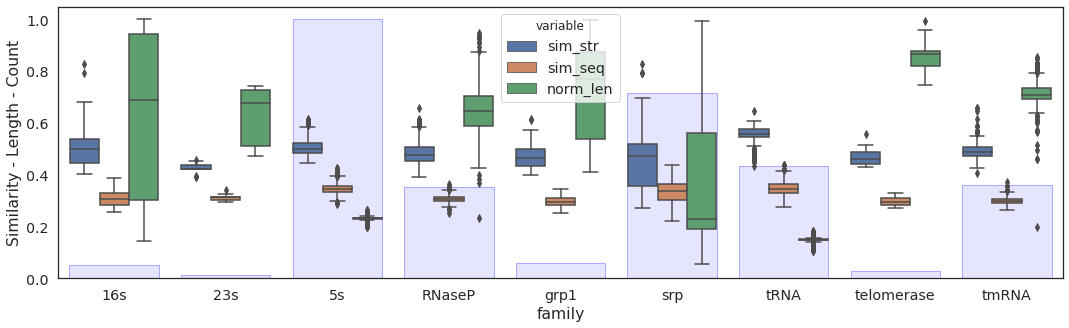

In [22]:
fig = sns.set(rc={'figure.figsize':(18,5)})
sns.set(font_scale=1.3)
sns.set_style(style='white') 

bp = sns.barplot(data=cc, y="norm_len", x=xorder2, order=xorder2,
                 facecolor=(0.0,0.0,1.0,0.1), linewidth=1, 
                 edgecolor=(0.0,0.0,1.0,0.3), zorder=-1)
bp.legend("normalized count",loc='upper left')

vp = sns.boxplot(data=famstats_melt_sim, y="value", hue="variable", x="family", order=xorder2)
vp.set_ylabel("Similarity - Length - Count")
#plt.legend(labels=['sim str', 'sim seq', 'len/512'],loc='upper left')


Text(0, 0.5, 'Distance - Length - Count')

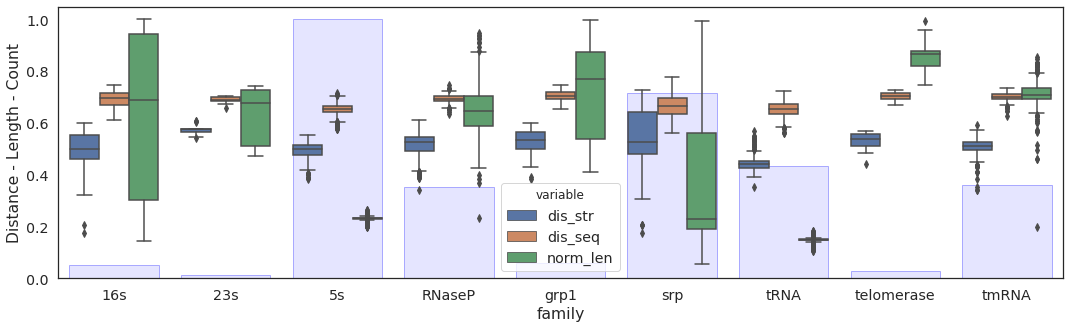

In [23]:
fig = sns.set(rc={'figure.figsize':(18,5)})
sns.set(font_scale=1.3)
sns.set_style(style='white') 

bp = sns.barplot(data=cc, y="norm_len", x=xorder2, order=xorder2,
                 facecolor=(0.0,0.0,1.0,0.1), linewidth=1, 
                 edgecolor=(0.0,0.0,1.0,0.3), zorder=-1)
bp.legend("normalized count",loc='upper left')

vp = sns.boxplot(data=famstats_melt_dis, y="value", hue="variable", x="family", order=xorder2)
vp.set_ylabel("Distance - Length - Count")
#plt.legend(labels=['sim str', 'sim seq', 'len/512'],loc='upper left')

# Tables

In [24]:
fam_order = ["grp1", "tmRNA", "tRNA", "5s", "srp", "telomerase", "RNaseP", "16s", "23s"]
csv_name = "famstats240205.csv"
famstats.groupby("family").mean().reindex(fam_order).transpose().to_csv(csv_name,sep="\t")
famstats.groupby("family").median().reindex(fam_order).transpose().to_csv(csv_name,sep="\t",mode="a")
famstats.groupby("family").min().reindex(fam_order).transpose().to_csv(csv_name,sep="\t",mode="a")
famstats.groupby("family").max().reindex(fam_order).transpose().to_csv(csv_name,sep="\t",mode="a")
famstats.groupby("family").std().reindex(fam_order).transpose().to_csv(csv_name,sep="\t",mode="a")